# GENDER CLASSIFICATION MODEL 

# Preprocess the Data

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    "C:\\Users\\PRAJES DAS\\Downloads\\Gender-Detection-master\\Gender-Detection-master\\gender_dataset_face",
    target_size=(96, 96),
    batch_size=32,
    class_mode='binary'
)


Found 2307 images belonging to 2 classes.


# Build the Model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\PRAJES DAS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Train the Model

In [3]:
history = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size
)


Epoch 1/10


C:\Users\PRAJES DAS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 183ms/step - accuracy: 0.5162 - loss: 0.7768
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 143us/step - accuracy: 0.5625 - loss: 0.8924
Epoch 3/10


C:\Users\PRAJES DAS\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 182ms/step - accuracy: 0.6916 - loss: 0.5950
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 109us/step - accuracy: 0.7500 - loss: 0.4924
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 193ms/step - accuracy: 0.7228 - loss: 0.5432
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 95us/step - accuracy: 0.7500 - loss: 0.4676 
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 182ms/step - accuracy: 0.7594 - loss: 0.5071
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 58us/step - accuracy: 0.7500 - loss: 0.5448 
Epoch 9/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 181ms/step - accuracy: 0.7912 - loss: 0.4569
Epoch 10/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 64us/step - accuracy: 0.7812 - loss: 0.5170 


# Save the Model

In [4]:
model.save('gender_detection_model.h5')


# Use the Model for Prediction

In [5]:
# import cv2
# import numpy as np
# from tensorflow.keras.preprocessing.image import img_to_array
# from tensorflow.keras.models import load_model

# # Load the trained model
# model = load_model('gender_detection_model.h5')

# # Define class labels
# classes = ['man', 'woman']

# # Open webcam
# webcam = cv2.VideoCapture(0)

# # Define function for prediction
# def predict_gender(face_crop):
#     face_crop = cv2.resize(face_crop, (96, 96))
#     face_crop = face_crop.astype("float32") / 255.0
#     face_crop = img_to_array(face_crop)
#     face_crop = np.expand_dims(face_crop, axis=0)
#     predictions = model.predict(face_crop)
#     idx = int(predictions[0][0] > 0.5)  # Threshold at 0.5
#     label = classes[idx]
#     confidence = (1 - predictions[0][0]) * 100 if idx == 0 else predictions[0][0] * 100
#     return label, confidence

# # Loop through frames
# while webcam.isOpened():
#     status, frame = webcam.read()
#     if not status:
#         print("Could not read frame")
#         break

#     faces, _ = cv.detect_face(frame)

#     for face in faces:
#         (startX, startY, endX, endY) = face
#         cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)
#         face_crop = frame[startY:endY, startX:endX]

#         if face_crop.shape[0] < 10 or face_crop.shape[1] < 10:
#             continue

#         label, confidence = predict_gender(face_crop)
#         label_text = f"{label}: {confidence:.2f}%"
#         Y = startY - 10 if startY - 10 > 10 else startY + 10
#         cv2.putText(frame, label_text, (startX, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

#     cv2.imshow("Gender Detection", frame)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# webcam.release()
# cv2.destroyAllWindows()





In [6]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

# Load the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the gender detection model
model = load_model('gender_detection_model.h5')

# Define class labels for gender prediction
classes = ['man', 'woman']

# Open webcam
webcam = cv2.VideoCapture(0)

# Preprocess the face for the gender model
def preprocess_face(face_crop):
    face_crop = cv2.resize(face_crop, (96, 96))  # Resize to the required input size of the model
    face_crop = face_crop.astype("float32") / 255.0  # Normalize pixel values
    face_crop = img_to_array(face_crop)  # Convert to array
    face_crop = np.expand_dims(face_crop, axis=0)  # Add batch dimension
    return face_crop

# Gender prediction function
def predict_gender(face_crop):
    face_crop = preprocess_face(face_crop)
    predictions = model.predict(face_crop)
    
    # Tune the threshold, e.g., use 0.5 for binary classification
    idx = int(predictions[0][0] > 0.5)
    label = classes[idx]
    
    # Confidence is either the model's probability output or 1 minus the output (for binary case)
    confidence = (1 - predictions[0][0]) * 100 if idx == 0 else predictions[0][0] * 100
    return label, confidence

# Main loop to read frames and make predictions
while webcam.isOpened():
    # Read frame from webcam
    status, frame = webcam.read()
    if not status:
        print("Could not read frame")
        break
    
    # Convert frame to grayscale for Haar Cascade
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Loop over each detected face
    for (x, y, w, h) in faces:
        # Draw bounding box around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        # Extract face from the frame
        face_crop = frame[y:y+h, x:x+w]

        # Ignore faces that are too small
        if face_crop.shape[0] < 10 or face_crop.shape[1] < 10:
            continue

        # Predict gender for the cropped face
        label, confidence = predict_gender(face_crop)
        label_text = f"{label}: {confidence:.2f}%"
        
        # Adjust text position
        Y = y - 10 if y - 10 > 10 else y + 10
        cv2.putText(frame, label_text, (x, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # Display the output frame with face detection and gender prediction
    cv2.imshow("Gender Detection", frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
webcam.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

# CHECK ACCURACY FOR THIS MODEL

# Split Your Dataset (Training/Validation)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


C:\Users\PRAJES DAS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Create data generators with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
     "C:\\Users\\PRAJES DAS\\Downloads\\Gender-Detection-master\\Gender-Detection-master\\gender_dataset_face",
    target_size=(96, 96),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
     "C:\\Users\\PRAJES DAS\\Downloads\\Gender-Detection-master\\Gender-Detection-master\\gender_dataset_face",
    target_size=(96, 96),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


Found 1847 images belonging to 2 classes.
Found 460 images belonging to 2 classes.
Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 15s 230ms/step - accuracy: 0.5478 - loss: 0.7193 - val_accuracy: 0.7076 - val_loss: 0.5779
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.5938 - loss: 0.6351 - val_accuracy: 0.5833 - val_loss: 0.6351
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 215ms/step - accuracy: 0.6582 - loss: 0.6098 - val_accuracy: 0.6272 - val_loss: 0.6841
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.5312 - loss: 0.7968 - val_accuracy: 0.6667 - val_loss: 0.5018
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 216ms/step - accuracy: 0.7032 - loss: 0.5815 - val_accuracy: 0.7746 - val_loss: 0.4815
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.7812 - loss: 0.3924 - val_accuracy: 0.6667 - val_loss: 0.6168
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 212ms/step - accuracy: 0.7428 - loss: 0.5135 - val_accuracy: 0.8036 - val_loss: 0.4341
Epoch 8/10
57/57 

# Plot Accuracy 

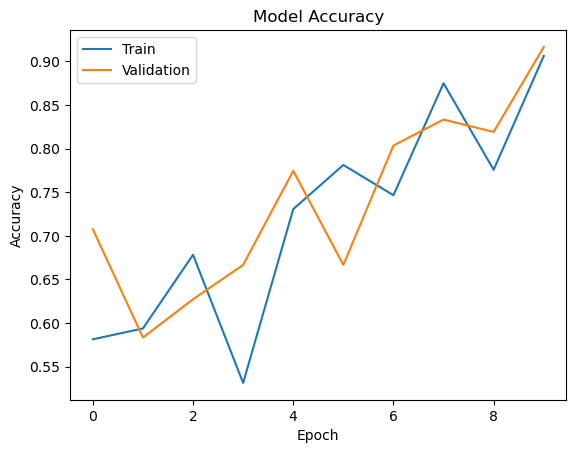

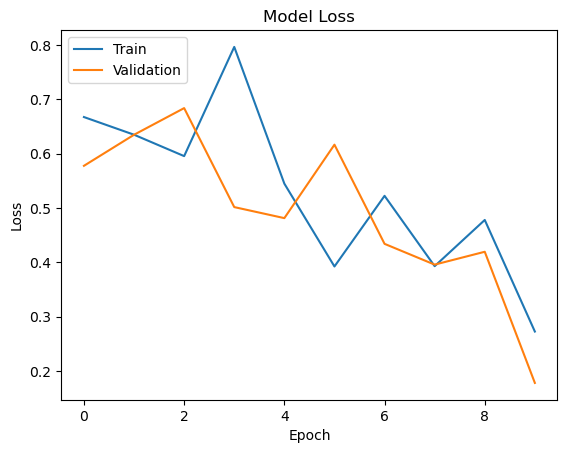

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# GENDER DETECTTION + COUNT TOTAL NO OF PEOPLE

In [13]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('gender_detection_model.h5')

# Define class labels
classes = ['man', 'woman']

# Open webcam
webcam = cv2.VideoCapture(0)

# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Define function for prediction
def predict_gender(face_crop):
    face_crop = cv2.resize(face_crop, (96, 96))
    face_crop = face_crop.astype("float32") / 255.0
    face_crop = img_to_array(face_crop)
    face_crop = np.expand_dims(face_crop, axis=0)
    predictions = model.predict(face_crop)
    idx = int(predictions[0][0] > 0.5)  # Threshold at 0.5
    label = classes[idx]
    confidence = (1 - predictions[0][0]) * 100 if idx == 0 else predictions[0][0] * 100
    return label, confidence

# Loop through frames
while webcam.isOpened():
    status, frame = webcam.read()
    if not status:
        print("Could not read frame")
        break

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    # Count the number of people
    num_people = len(faces)

    for (startX, startY, width, height) in faces:
        endX, endY = startX + width, startY + height
        cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)
        face_crop = frame[startY:endY, startX:endX]

        if face_crop.shape[0] < 10 or face_crop.shape[1] < 10:
            continue

        label, confidence = predict_gender(face_crop)
        label_text = f"{label}: {confidence:.2f}%"
        Y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.putText(frame, label_text, (startX, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # Display the number of people detected
    cv2.putText(frame, f"Total people: {num_people}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("Gender Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

webcam.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

# Load the trained gender detection model
gender_model = load_model('gender_detection_model.h5')

# Define class labels for gender
gender_classes = ['man', 'woman']

# Updated age categories
age_classes = ['0-2', '3-9', '10-19', '20-29', '30-39', '40-59', '60+']

# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the pre-trained age model
age_net = cv2.dnn.readNetFromCaffe('age_deploy.prototxt', 'age_net.caffemodel')

# Function for gender prediction
def predict_gender(face_crop):
    face_crop = cv2.resize(face_crop, (96, 96))
    face_crop = face_crop.astype("float32") / 255.0
    face_crop = img_to_array(face_crop)
    face_crop = np.expand_dims(face_crop, axis=0)
    predictions = gender_model.predict(face_crop)
    idx = int(predictions[0][0] > 0.5)  # Threshold at 0.5
    label = gender_classes[idx]
    confidence = (1 - predictions[0][0]) * 100 if idx == 0 else predictions[0][0] * 100
    return label, confidence

# Function for age prediction
def predict_age(face_crop):
    blob = cv2.dnn.blobFromImage(face_crop, 1, (227, 227), (78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
    age_net.setInput(blob)
    age_predictions = age_net.forward()
    age_index = age_predictions[0].argmax()
    age_label = age_classes[age_index]
    age_confidence = age_predictions[0][age_index] * 100
    return age_label, age_confidence

# Open webcam
webcam = cv2.VideoCapture(0)

# Loop through frames
while webcam.isOpened():
    status, frame = webcam.read()
    if not status:
        print("Could not read frame")
        break

    # Convert frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    # Count the number of people
    num_people = len(faces)

    for (startX, startY, width, height) in faces:
        endX, endY = startX + width, startY + height
        cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)
        face_crop = frame[startY:endY, startX:endX]

        if face_crop.shape[0] < 10 or face_crop.shape[1] < 10:
            continue

        # Predict gender
        gender_label, gender_confidence = predict_gender(face_crop)
        gender_text = f"{gender_label}: {gender_confidence:.2f}%"

        # Predict age
        age_label, age_confidence = predict_age(face_crop)
        age_text = f"Age: {age_label}, {age_confidence:.2f}%"

        # Display gender and age predictions
        label_text = f"{gender_text} | {age_text}"
        Y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.putText(frame, label_text, (startX, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the number of people detected
    cv2.putText(frame, f"Total people: {num_people}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show the frame
    cv2.imshow("Gender and Age Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

webcam.release()
cv2.destroyAllWindows()
